In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pycroscopy as px
import pyUSID as usid
import sidpy

/Users/sulaymandesai/.pyenv/versions/3.8.3/lib/python3.8/site-packages/pyUSID/viz/__init__.py:16: FutureWarning: Please use sidpy.viz.plot_utils instead of pyUSID.viz.plot_utils. pyUSID.plot_utils will be removed in a future release of pyUSID
  warn('Please use sidpy.viz.plot_utils instead of pyUSID.viz.plot_utils. '


In [2]:
array = np.array([[1, 2, 3, 4, 5], 
                  [6, 7, 8, 9, 10],
                 [11, 12, 13, 14, 15],
                 [16, 17, 18, 19, 20],
                 [21, 22, 23, 24, 25]])
array

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25]])

In [3]:
array.shape

(5, 5)

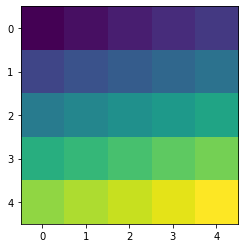

In [4]:
plt.imshow(array)

In [5]:
array_reshaped = np.reshape(array, (array.shape[0]*array.shape[1], 1))
array_reshaped

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25]])

In [6]:
array_reshaped.shape

(25, 1)

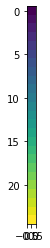

In [7]:
plt.imshow(array_reshaped)

In [8]:
# extracting values for length of x and y axis
xaxis = 5
yaxis = 5

In [9]:
# Extracting no. of rows and cols and calculating the position dimension length
num_rows = 5
num_cols = 5
num_pos = num_rows * num_cols

In [10]:
# Creating axis array of values which raw data is varied over
y_qty = 'Y'
y_units = 'arb'
y_vec = np.array([0,1,2,3,4])

x_qty = 'X'
x_units = 'arb'
x_vec = np.array([0,1,2,3,4])

In [11]:
main_data_name = 'array'
main_qty = 'random values'
main_units = 'arb'

In [12]:
import h5py
h5_path_1 = h5py.File('mytestfile.h5', 'w')

In [13]:
h5_path_1.close()

In [14]:
# Expressing spectroscopic dimension
spec_dims = usid.Dimension(name = 'arb.', units = '', values = int(1))

In [15]:
# Expressing position dimension
pos_dims = [usid.Dimension(x_qty, x_units, x_vec),
            usid.Dimension(y_qty, y_units, y_vec)]

In [16]:
h5_path_1 = '/Users/sulaymandesai/Documents/Year_4/MSciProject/Load data/mytestfile.h5'

In [17]:
# Applying numpy translator
tran = usid.NumpyTranslator()
_ = tran.translate(h5_path_1, main_data_name,
                   array_reshaped, main_qty, main_units,
                   pos_dims, spec_dims)

/Users/sulaymandesai/.pyenv/versions/3.8.3/lib/python3.8/site-packages/sidpy/sid/translator.py:42: FutureWarning: Consider using sidpy.Reader instead of sidpy.Translator if possible and contribute your reader to ScopeReaders
  warn('Consider using sidpy.Reader instead of sidpy.Translator if '
/Users/sulaymandesai/.pyenv/versions/3.8.3/lib/python3.8/site-packages/pyUSID/io/dtype_utils.py:62: FutureWarning: pyUSID.io.dtype_utils.contains_integers has been moved to sidpy.base.num_utils.contains_integers. This copy in pyUSID willbe removed in future release. Please update your import statements
  warn('pyUSID.io.dtype_utils.contains_integers has been moved to '
/Users/sulaymandesai/.pyenv/versions/3.8.3/lib/python3.8/site-packages/pyUSID/io/dtype_utils.py:309: FutureWarning: pyUSID.io.dtype_utils.validate_single_string_arg has been moved to sidpy.base.string_utils.validate_single_string_arg. This copy in pyUSID willbe removed in future release. Please update your import statements
  warn('

In [18]:
# Printing HDF5 file tree
h5_file = h5py.File(h5_path_1, mode='r')
usid.hdf_utils.print_tree(h5_file)

/
├ Measurement_000
  ---------------
  ├ Channel_000
    -----------
    ├ Position_Indices
    ├ Position_Values
    ├ Raw_Data
    ├ Spectroscopic_Indices
    ├ Spectroscopic_Values


In [19]:
print(h5_file['/Measurement_000/Channel_000/Position_Indices'])
print(h5_file['/Measurement_000/Channel_000/Position_Values'])
print(h5_file['/Measurement_000/Channel_000/Spectroscopic_Indices'])
print(h5_file['/Measurement_000/Channel_000/Spectroscopic_Values'])

<HDF5 dataset "Position_Indices": shape (25, 2), type "<u4">
<HDF5 dataset "Position_Values": shape (25, 2), type "<f4">
<HDF5 dataset "Spectroscopic_Indices": shape (1, 1), type "<u4">
<HDF5 dataset "Spectroscopic_Values": shape (1, 1), type "<f4">


In [20]:
h5_topo = usid.USIDataset(h5_file['/Measurement_000/Channel_000/Raw_Data'])
print(h5_topo)

<HDF5 dataset "Raw_Data": shape (25, 1), type "<i8">
located at: 
	/Measurement_000/Channel_000/Raw_Data 
Data contains: 
	random values (arb) 
Data dimensions and original shape: 
Position Dimensions: 
	Y - size: 5 
	X - size: 5 
Spectroscopic Dimensions: 
	arb. - size: 1
Data Type:
	int64


(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11dbb4eb0>)

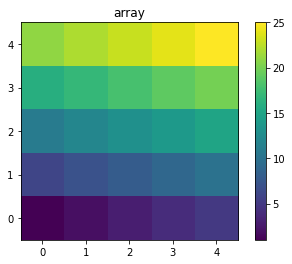

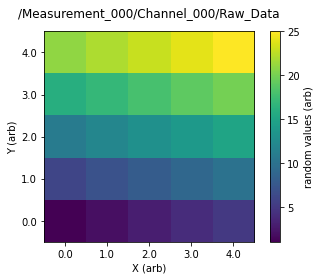

In [21]:
plt.imshow(array, origin = 'lower')
plt.colorbar()
plt.title('array')

h5_topo.visualize(num_ticks = 5)

In [22]:
h5_file.close()